In [163]:
#load modules
from ucimlrepo import fetch_ucirepo
from sklearn.feature_selection import f_classif, SelectKBest

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot
import warnings

warnings.filterwarnings('ignore')

In [164]:
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 

# description  of each feature abd check for missing values
breast_cancer_wisconsin_diagnostic.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Categorical,None,None,None,no
1,Diagnosis,Target,Categorical,None,None,None,no
2,radius1,Feature,Continuous,None,None,None,no
3,texture1,Feature,Continuous,None,None,None,no
4,perimeter1,Feature,Continuous,None,None,None,no
5,area1,Feature,Continuous,None,None,None,no
6,smoothness1,Feature,Continuous,None,None,None,no
7,compactness1,Feature,Continuous,None,None,None,no
8,concavity1,Feature,Continuous,None,None,None,no
9,concave_points1,Feature,Continuous,None,None,None,no


In [165]:
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets

y.replace(['B', 'M'],[0, 1], inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature 0: 482.233945
Feature 1: 94.917788
Feature 2: 522.489267
Feature 3: 423.654133
Feature 4: 74.190147
Feature 5: 242.589647
Feature 6: 396.662370
Feature 7: 695.179785
Feature 8: 62.469542
Feature 9: 0.092756
Feature 10: 186.591816
Feature 11: 0.004714
Feature 12: 176.223231
Feature 13: 165.307401
Feature 14: 1.535574
Feature 15: 31.338791
Feature 16: 22.179613
Feature 17: 76.565923
Feature 18: 0.010104
Feature 19: 0.790104
Feature 20: 645.350668
Feature 21: 126.681903
Feature 22: 681.263759
Feature 23: 495.787667
Feature 24: 102.973429
Feature 25: 240.492785
Feature 26: 331.330906
Feature 27: 746.492117
Feature 28: 108.953927
Feature 29: 49.197922


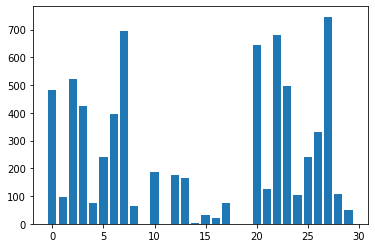

In [166]:
# feature selection - filter
##feature selection
def features_score(X_train, y_train):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    return fs

fs = features_score(X_train, y_train)

##show scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
##plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [167]:
# feature selection - filter
##base on the plot above, 16 features can be removed and 14 features are retained

##feature selection
fs = SelectKBest(score_func=f_classif, k=14)
# learn relationship from training data
X_train_fs = fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

In [168]:
# Training logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

LogisticRegression(solver='liblinear')

In [169]:
# Use the model to make predictions on the testing data
y_pred = model.predict(X_test_fs)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [170]:
# feature selection - wrapper
from sklearn.feature_selection import RFECV
from numpy import array 

model_warpper = LogisticRegression()

# Use RFE to select the top 10 features
rfe = RFECV(model_warpper, step=1, cv=5)
rfe.fit(X, y)

RFECV(cv=5, estimator=LogisticRegression())

In [171]:
feature_names = array(breast_cancer_wisconsin_diagnostic.data.features.columns)

mask = rfe.get_support()
best_features = feature_names[mask]

print("Selected best: ", best_features.shape[0])
print(feature_names[mask]) 

Selected best:  23
['radius1' 'texture1' 'smoothness1' 'compactness1' 'concavity1'
 'concave_points1' 'symmetry1' 'radius2' 'texture2' 'perimeter2' 'area2'
 'compactness2' 'concavity2' 'symmetry2' 'radius3' 'texture3' 'perimeter3'
 'smoothness3' 'compactness3' 'concavity3' 'concave_points3' 'symmetry3'
 'fractal_dimension3']


In [172]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [173]:
# Training logistic regression model
model_warpper = LogisticRegression(solver='liblinear')
model_warpper.fit(X_train_rfe, y_train)

LogisticRegression(solver='liblinear')

In [174]:
# Use the model to make predictions on the testing data
y_pred = model_warpper.predict(X_test_rfe)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [175]:
# feature selection - embedded

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [176]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [177]:
sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))
sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [178]:
sel_feats = X_train.columns[(sel_.estimator_.coef_ != 0).ravel().tolist()]
sel_feats

Index(['texture1', 'concave_points1', 'radius2', 'texture2', 'smoothness2',
       'compactness2', 'symmetry2', 'fractal_dimension2', 'radius3',
       'texture3', 'area3', 'smoothness3', 'concavity3', 'concave_points3',
       'symmetry3'],
      dtype='object')

In [179]:
X_train_selected = sel_.transform(scaler.transform(X_train))
X_test_selected = sel_.transform(scaler.transform(X_test))

In [180]:
# Training logistic regression model
model_emb = LogisticRegression(solver='liblinear')
model_emb.fit(X_train_selected, y_train)

LogisticRegression(solver='liblinear')

In [181]:
# Use the model to make predictions on the testing data
y_pred = model_emb.predict(X_test_selected)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [182]:
log = LogisticRegression(solver='liblinear')
log.fit(X_train, y_train)

# Control model
LogisticRegression(solver='liblinear')

In [183]:
y_pred = log.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

